## Line chart for the top 3 countries over the 5 years, iceland, denmark, norway
##### 

In [1]:
# data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# linear modelling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as sts

In [2]:
filepath1 = "Vertical_Merge.csv"
df = pd.read_csv(filepath1)

In [3]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [37]:
df["Happiness Rank"].max()

158

In [26]:
topdf = df.loc[df["Happiness Rank"] <= 5]
topdf

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.5870,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015
1,Iceland,2,7.5610,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2015
2,Denmark,3,7.5270,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2015
3,Norway,4,7.5220,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2015
4,Canada,5,7.4270,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2015
158,Denmark,1,7.5260,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2016
159,Switzerland,2,7.5090,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,2016
160,Iceland,3,7.5010,1.426660,1.183260,0.867330,0.566240,0.149750,0.476780,2016
161,Norway,4,7.4980,1.577440,1.126900,0.795790,0.596090,0.357760,0.378950,2016
162,Finland,5,7.4130,1.405980,1.134640,0.810910,0.571040,0.410040,0.254920,2016


## Bottom 3 countries 

In [89]:
bottomdf = df.loc[df["Happiness Rank"] >= 138]
bottomdf["Country"].value_counts()

Afghanistan                 6
Rwanda                      6
Tanzania                    6
Burundi                     6
Central African Republic    5
Yemen                       5
Syria                       5
South Sudan                 5
Togo                        5
Madagascar                  5
Liberia                     4
Haiti                       4
Botswana                    4
Zimbabwe                    4
Lesotho                     4
Guinea                      4
Malawi                      3
Benin                       3
Comoros                     3
Angola                      3
Burkina Faso                2
Chad                        2
Zambia                      2
Ivory Coast                 2
Uganda                      2
India                       2
Cambodia                    2
Niger                       2
Congo (Brazzaville)         1
Ukraine                     1
Egypt                       1
Sierra Leone                1
Senegal                     1
Mali      

In [79]:
rwanda = bottomdf.loc[bottomdf["Country"]=="Rwanda"]
rwanda

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year
153,Rwanda,154,3.4650,0.222080,0.773700,0.428640,0.592010,0.551910,0.226280,2015
309,Rwanda,152,3.5150,0.328460,0.615860,0.318650,0.543200,0.505210,0.235520,2016
465,Rwanda,151,3.4710,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,2017
620,Rwanda,151,3.4080,0.332000,0.896000,0.400000,0.636000,0.444000,0.200000,2018
777,Rwanda,152,3.3340,0.359000,0.711000,0.614000,0.555000,0.411000,0.217000,2019
931,Rwanda,150,3.3123,7.600104,0.540835,61.098846,0.900589,0.183541,0.055484,2020


In [90]:
afghanistan = bottomdf.loc[bottomdf["Country"]=="Afghanistan"]
afghanistan

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year
152,Afghanistan,153,3.5750,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,2015
311,Afghanistan,154,3.3600,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2016
455,Afghanistan,141,3.7940,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2017
614,Afghanistan,145,3.6320,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,2018
779,Afghanistan,154,3.2030,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,2019
934,Afghanistan,153,2.5669,7.462861,0.470367,52.590000,0.396573,0.933687,-0.096429,2020


In [94]:
tanzania = bottomdf.loc[bottomdf["Country"]=="Tanzania"]
tanzania

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year
145,Tanzania,146,3.7810,0.285200,1.002680,0.382150,0.328780,0.057470,0.343770,2015
306,Tanzania,149,3.6660,0.471550,0.776230,0.357000,0.317600,0.050990,0.314720,2016
467,Tanzania,153,3.3490,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,2017
622,Tanzania,153,3.3030,0.455000,0.991000,0.381000,0.481000,0.097000,0.270000,2018
778,Tanzania,153,3.2310,0.476000,0.885000,0.499000,0.417000,0.147000,0.276000,2019
929,Tanzania,148,3.4762,7.967665,0.688933,57.496075,0.821540,0.619799,0.109669,2020


In [82]:
years = rwanda.Year

In [96]:
rwandavalues = rwanda["Happiness Score"].values
afghanvalues = afghanistan["Happiness Score"].values
tanzaniavalues = tanzania["Happiness Score"].values

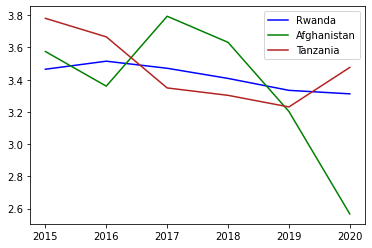

In [97]:
plt.plot(years, rwandavalues,color="blue",label="Rwanda")

plt.plot(years, afghanvalues, color="green", label="Afghanistan")

plt.plot(years, tanzaniavalues ,color="firebrick", label="Tanzania")

plt.legend()

plt.show()

## Top 3 Countries 

In [62]:
iceland = topdf.loc[topdf["Country"]=="Iceland"]
iceland

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year
1,Iceland,2,7.5610,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2015
160,Iceland,3,7.5010,1.426660,1.183260,0.867330,0.566240,0.149750,0.476780,2016
317,Iceland,3,7.5040,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2017
473,Iceland,4,7.4950,1.343000,1.644000,0.914000,0.677000,0.138000,0.353000,2018
629,Iceland,4,7.4940,1.380000,1.624000,1.026000,0.591000,0.118000,0.354000,2019
785,Iceland,4,7.5045,10.772559,0.974670,73.000000,0.948892,0.711710,0.246944,2020


In [63]:
icevalues = iceland["Happiness Score"].values

In [31]:
norway = topdf.loc[topdf["Country"]=="Norway"]
norway

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year
3,Norway,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2015
161,Norway,4,7.498,1.577440,1.126900,0.795790,0.596090,0.357760,0.378950,2016
315,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2017
471,Norway,2,7.594,1.456000,1.582000,0.861000,0.686000,0.340000,0.286000,2018
628,Norway,3,7.554,1.488000,1.582000,1.028000,0.603000,0.341000,0.271000,2019
786,Norway,5,7.488,11.087804,0.952487,73.200783,0.955750,0.263218,0.134533,2020


In [32]:
denmark = topdf.loc[topdf["Country"]=="Denmark"]
denmark

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year
2,Denmark,3,7.5270,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2015
158,Denmark,1,7.5260,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2016
316,Denmark,2,7.5220,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2017
472,Denmark,3,7.5550,1.351000,1.590000,0.868000,0.683000,0.408000,0.284000,2018
627,Denmark,2,7.6000,1.383000,1.573000,0.996000,0.592000,0.410000,0.252000,2019
783,Denmark,2,7.6456,10.774001,0.955991,72.402504,0.951444,0.168489,0.066202,2020


In [74]:
years = denmark.Year

In [67]:
denvalues = denmark["Happiness Score"].values
norvalues = norway["Happiness Score"].values
icevalues = iceland["Happiness Score"].values

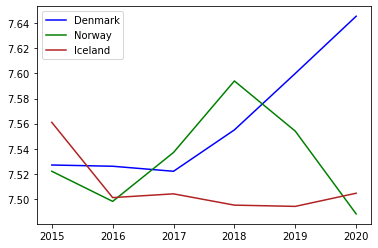

In [75]:
plt.plot(years, denvalues,color="blue",label="Denmark")

plt.plot(years, norvalues,color="green",label="Norway")

plt.plot(years,icevalues,color="firebrick", label="Iceland")

plt.legend()

plt.show()

In [ ]:
denvalues = denmark[""].values
norvalues = norway["Happiness Score"].values
icevalues = iceland["Happiness Score"].values

In [ ]:
plt.plot(years, denvalues,color="blue",label="Denmark")

plt.plot(years, norvalues,color="green",label="Norway")

plt.plot(years,icevalues,color="firebrick", label="Iceland")

plt.legend()

plt.show()